### Pytorch training codes test
- File name: pt_train_test.ipynb
- Last updated: 2021.5.25

In [1]:
import torch

from pt_modules import get_dataloaders, SimpleCNN, ManualTrainer
from pt_modules import plot_images

In [2]:
## Parameters
seed = 11
torch.manual_seed(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_epochs = 20
batch_size = 512

## Dataset
train_loader, valid_loader, test_loader = get_dataloaders(
        batch_size, seed=seed, flatten=False)

## Model
model = SimpleCNN().to(device)
loss_fn = torch.nn.NLLLoss()
optim = torch.optim.Adam(model.parameters())

## Training
trainer = ManualTrainer(model, optim, loss_fn, device)
trainer.fit(train_loader, valid_loader, n_epochs)
# trainer.plot_history()

Epoch [  1/ 20] >> train_loss = 1.2939, valid_loss = 0.3829, lowest_loss = 0.3829 @epoch = 1
Epoch [  2/ 20] >> train_loss = 0.5181, valid_loss = 0.2457, lowest_loss = 0.2457 @epoch = 2
Epoch [  3/ 20] >> train_loss = 0.3982, valid_loss = 0.1819, lowest_loss = 0.1819 @epoch = 3
Epoch [  4/ 20] >> train_loss = 0.3402, valid_loss = 0.1475, lowest_loss = 0.1475 @epoch = 4
Epoch [  5/ 20] >> train_loss = 0.2931, valid_loss = 0.1252, lowest_loss = 0.1252 @epoch = 5
Epoch [  6/ 20] >> train_loss = 0.2666, valid_loss = 0.1132, lowest_loss = 0.1132 @epoch = 6
Epoch [  7/ 20] >> train_loss = 0.2458, valid_loss = 0.1017, lowest_loss = 0.1017 @epoch = 7
Epoch [  8/ 20] >> train_loss = 0.2266, valid_loss = 0.0945, lowest_loss = 0.0945 @epoch = 8
Epoch [  9/ 20] >> train_loss = 0.2170, valid_loss = 0.0890, lowest_loss = 0.0890 @epoch = 9
Epoch [ 10/ 20] >> train_loss = 0.2017, valid_loss = 0.0826, lowest_loss = 0.0826 @epoch = 10
Epoch [ 11/ 20] >> train_loss = 0.1989, valid_loss = 0.0820, lowest_l

In [3]:
## Test
from pt_modules import accuracy, average

train_loss = average(loss_fn, model, train_loader)
valid_loss = average(loss_fn, model, valid_loader)
test_loss  = average(loss_fn, model, test_loader)

train_acc = average(accuracy, model, train_loader)
valid_acc = average(accuracy, model, valid_loader)
test_acc  = average(accuracy, model, test_loader)

print(">> train_loss = %.4f, train_acc = %.4f" % (train_loss, train_acc))
print(">> valid_loss = %.4f, valid_acc = %.4f" % (valid_loss, valid_acc))
print(">> test_loss  = %.4f, test_acc  = %.4f" % (test_loss, test_acc))

>> train_loss = 0.0480, train_acc = 0.9850
>> valid_loss = 0.0629, valid_acc = 0.9812
>> test_loss  = 0.0517, test_acc  = 0.9846


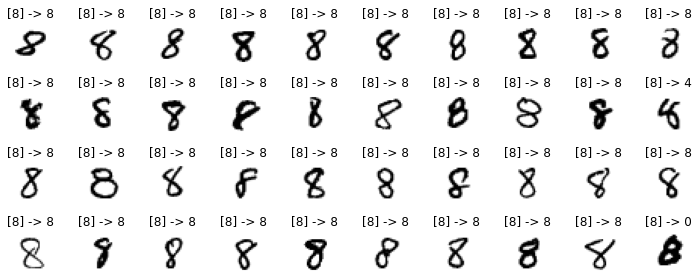

In [11]:
from pt_modules import select_condition

images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
preds = model(images).argmax(-1)

x, y, y_hat = select_condition(images, labels, preds, condition=[8])
plot_images(x.reshape(-1, 28, 28), y, y_hat)

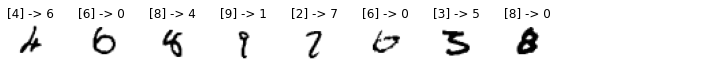

In [8]:
from pt_modules import select_incorrect

images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
preds = model(images).argmax(-1)

x, y, y_hat = select_incorrect(images, labels, preds)
plot_images(x.reshape(-1, 28, 28), y, y_hat)

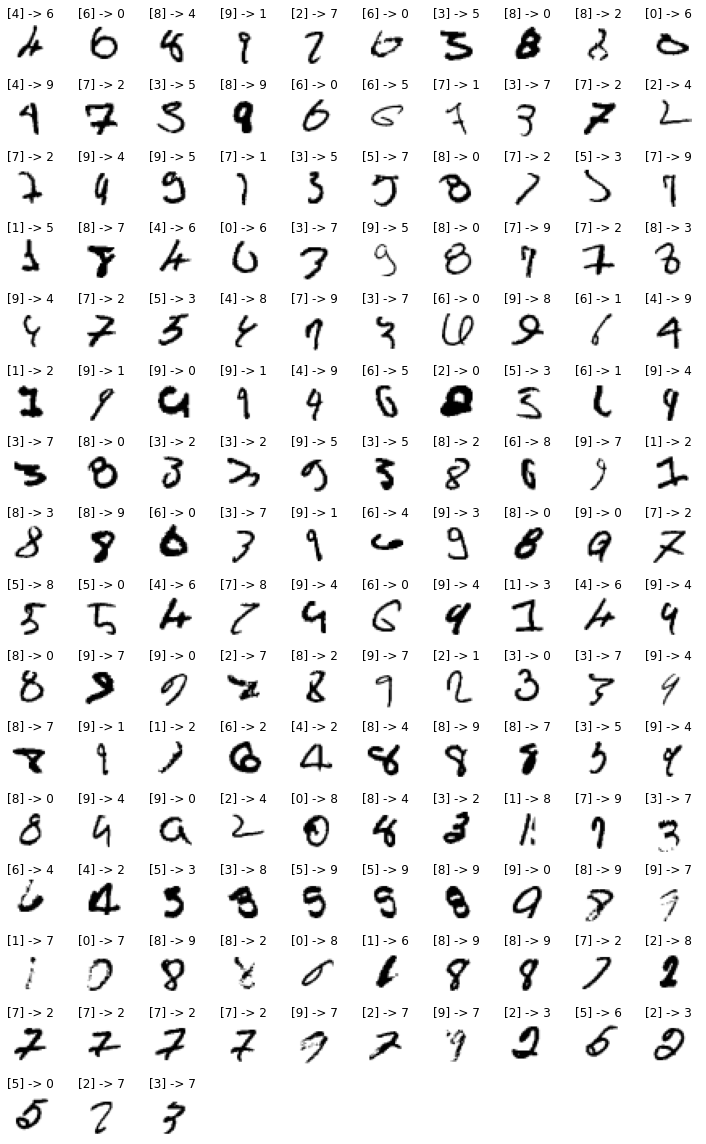

In [6]:
from pt_modules import select_incorrect_dataloader

images, labels, preds = select_incorrect_dataloader(model, test_loader)
plot_images(images.reshape(-1, 28, 28), labels, preds)